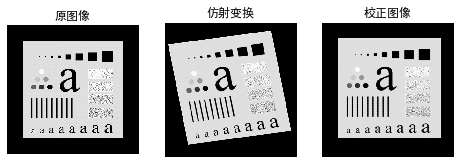

In [1]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
%matplotlib inline
%config InlinBackend.figure_format="retina"
plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus']=False #用来正常显示负

img0 = cv2.imread(r'..\img\alphabet.jpg',0)
img1=cv2.copyMakeBorder(img0,50,50,50,50,cv2.BORDER_CONSTANT,value=0)
(cols,rows)=img1.shape
pts1 = np.float32([[50,50],[200,50],[50,200]])#原图像上的三个参考点
pts2 = np.float32([[10,70],[160,50],[40,220]])#目标图像上的三个参考点
M1 = cv2.getAffineTransform(pts1,pts2)  #仿射变换矩阵
dst1 = cv2.warpAffine(img1,M1,(cols,rows))  #仿射变换
M2 = cv2.getAffineTransform(pts2,pts1)    #逆仿射变换矩阵
dst2 = cv2.warpAffine(dst1,M2,(cols,rows))#仿射校正
plt.figure(figsize=(8,5))
plt.subplot(131)
plt.title("原图像")
plt.axis("off")
plt.imshow(img1,cmap="gray")
plt.subplot(132)
plt.title("仿射变换")
plt.axis("off")
plt.imshow(dst1,cmap="gray")
plt.subplot(133)
plt.title("校正图像")
plt.axis("off")
plt.imshow(dst2,cmap="gray")
plt.show()
